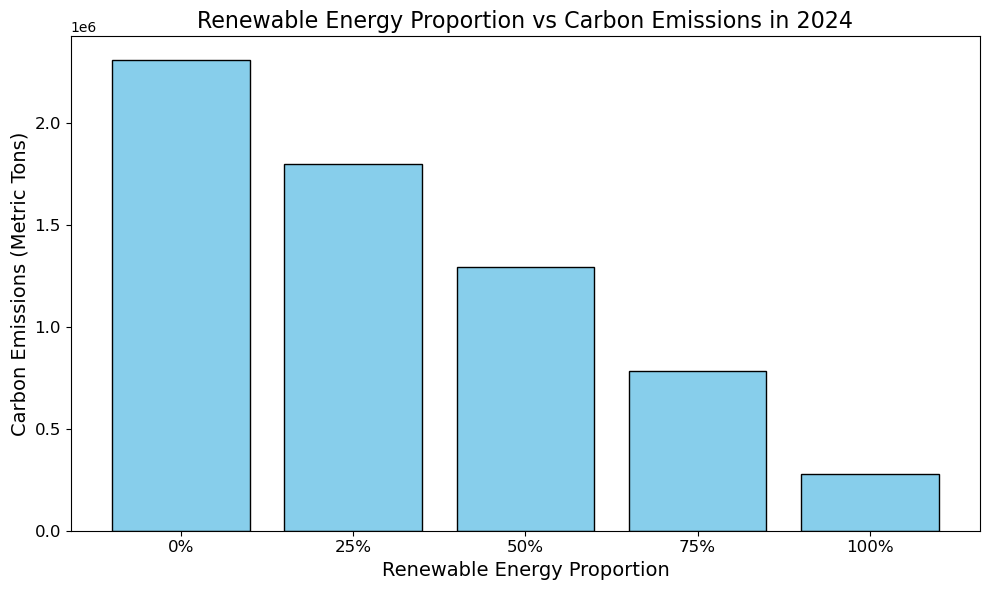

In [1]:
import matplotlib.pyplot as plt

# Data
renewable_energy_proportion = ["0%", "25%", "50%", "75%", "100%"]
carbon_emissions = [2310000, 1801580, 1293160, 784740, 276320]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(renewable_energy_proportion, carbon_emissions, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Renewable Energy Proportion vs Carbon Emissions in 2024", fontsize=16, color='black')
plt.xlabel("Renewable Energy Proportion", fontsize=14, color='black')
plt.ylabel("Carbon Emissions (Metric Tons)", fontsize=14, color='black')

# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.savefig('RenewableEnergy_vs_CarbonEmissions_2024.png')
plt.show()


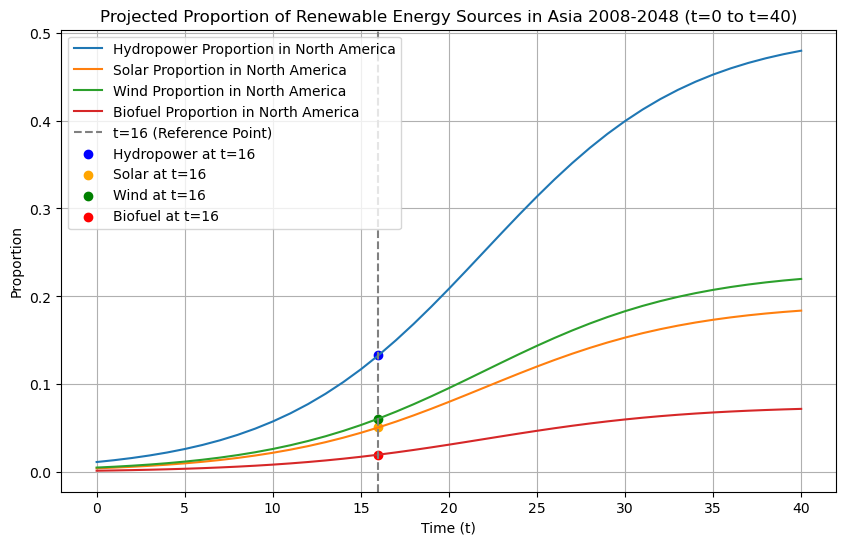

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.17002344  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.133,
    "Solar": 0.051,
    "Wind": 0.061,
    "Biofuel": 0.02
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in Asia 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogisticAsia.png")
plt.show()



In [3]:
# Calculate the total renewable energy proportion over time
total_proportions = np.zeros_like(t, dtype=float)

# Sum the proportions from all renewable sources at each time step
for source, proportions in renewable_proportions.items():
    total_proportions += proportions

# Define the thresholds to find
thresholds = [0.25, 0.5, 0.75, 1.0]
threshold_times = {}

# Find the first time each threshold is reached
for threshold in thresholds:
    try:
        time_reached = t[np.where(total_proportions >= threshold)[0][0]]
        threshold_times[threshold] = time_reached
    except IndexError:
        threshold_times[threshold] = None  # In case the threshold is not reached

# Display the results
print("Times when total renewable energy proportions are reached:")
for threshold, time_reached in threshold_times.items():
    if time_reached is not None:
        print(f"Threshold {threshold}: t={time_reached}")
    else:
        print(f"Threshold {threshold}: Not reached within the given time period.")


Times when total renewable energy proportions are reached:
Threshold 0.25: t=16
Threshold 0.5: t=23
Threshold 0.75: t=29
Threshold 1.0: Not reached within the given time period.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.17002344  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Extend time period dynamically
t = np.arange(0, 500)  # Extend the time range to ensure logistic growth has enough time

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.133,
    "Solar": 0.051,
    "Wind": 0.061,
    "Biofuel": 0.02
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 onward
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Calculate the total renewable energy proportion over time
total_proportions = np.zeros_like(t, dtype=float)

# Sum the proportions from all renewable sources at each time step
for source, proportions in renewable_proportions.items():
    total_proportions += proportions

# Find the time when the total proportion reaches 0.99
threshold = 0.99
try:
    time_reached = t[np.where(total_proportions >= threshold)[0][0]]
    print(f"The total renewable energy proportion reaches {threshold} at t={time_reached}.")
except IndexError:
    print(f"The total renewable energy proportion does not reach {threshold} within the given time range.")


The total renewable energy proportion reaches 0.99 at t=50.


In [5]:
# Define specific time steps to calculate proportions
time_steps = [16, 23, 29, 50]

# Dictionary to store proportions for each time step
proportions_at_steps = {time: {} for time in time_steps}

# Calculate proportions for each specified time step
for time in time_steps:
    for source, proportions in renewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("Proportions of Renewable Energy Sources at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nt = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


Proportions of Renewable Energy Sources at Specific Time Steps:

t = 16:
  Hydropower: 0.133000
  Solar: 0.051000
  Wind: 0.061000
  Biofuel: 0.020000

t = 23:
  Hydropower: 0.272225
  Solar: 0.104387
  Wind: 0.124855
  Biofuel: 0.040936

t = 29:
  Hydropower: 0.384832
  Solar: 0.147567
  Wind: 0.176502
  Biofuel: 0.057869

t = 50:
  Hydropower: 0.497627
  Solar: 0.190819
  Wind: 0.228235
  Biofuel: 0.074831


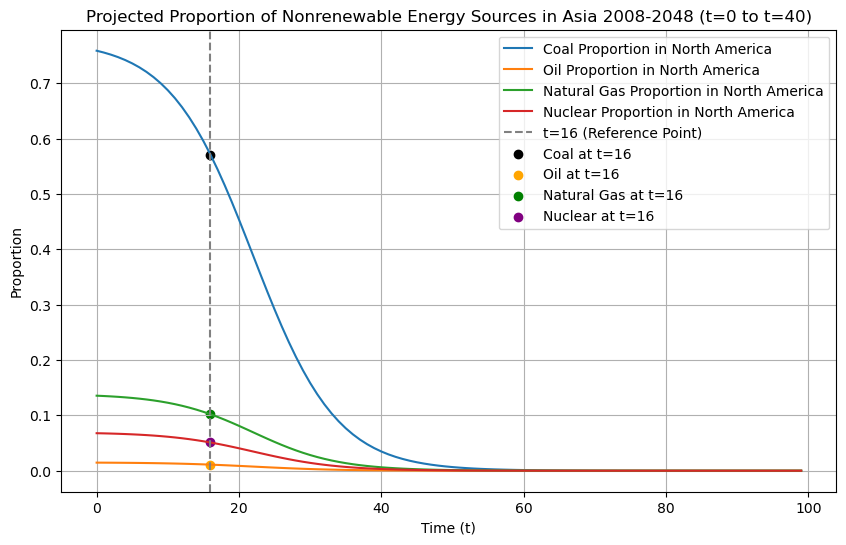

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.17002344  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 100)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.133,
    "Solar": 0.051,
    "Wind": 0.061,
    "Biofuel": 0.02
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.571,
    "Oil": 0.011,
    "Natural Gas": 0.102,
    "Nuclear": 0.051
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in Asia 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogisticAsia.png")
plt.show()


In [7]:
# Calculate total nonrenewable proportions over time
total_nonrenewable_proportions = np.zeros_like(t, dtype=float)
for source, proportions in nonrenewable_proportions.items():
    total_nonrenewable_proportions += proportions

# Find the times when the total nonrenewable proportion falls below the thresholds
thresholds = [0.75, 0.5, 0.25, 0.01]
threshold_times = {}

for threshold in thresholds:
    try:
        time_reached = t[np.where(total_nonrenewable_proportions <= threshold)[0][0]]
        threshold_times[threshold] = time_reached
    except IndexError:
        threshold_times[threshold] = None  # If threshold is not reached within the time range

# Display the threshold times
print("Times when total nonrenewable energy proportions fall below specific thresholds:")
for threshold, time_reached in threshold_times.items():
    if time_reached is not None:
        print(f"Threshold {threshold}: t={time_reached}")
    else:
        print(f"Threshold {threshold}: Not reached within the given time period.")

# Calculate and display nonrenewable proportions at specific time steps
time_steps = [16, 23, 29, 50]
proportions_at_steps = {time: {} for time in time_steps}

for time in time_steps:
    for source, proportions in nonrenewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("\nProportions of Nonrenewable Energy Sources at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nt = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


Times when total nonrenewable energy proportions fall below specific thresholds:
Threshold 0.75: t=16
Threshold 0.5: t=23
Threshold 0.25: t=29
Threshold 0.01: t=50

Proportions of Nonrenewable Energy Sources at Specific Time Steps:

t = 16:
  Coal: 0.571000
  Oil: 0.011000
  Natural Gas: 0.102000
  Nuclear: 0.051000

t = 23:
  Coal: 0.355493
  Oil: 0.006848
  Natural Gas: 0.063503
  Nuclear: 0.031752

t = 29:
  Coal: 0.181189
  Oil: 0.003491
  Natural Gas: 0.032367
  Nuclear: 0.016183

t = 50:
  Coal: 0.006594
  Oil: 0.000127
  Natural Gas: 0.001178
  Nuclear: 0.000589


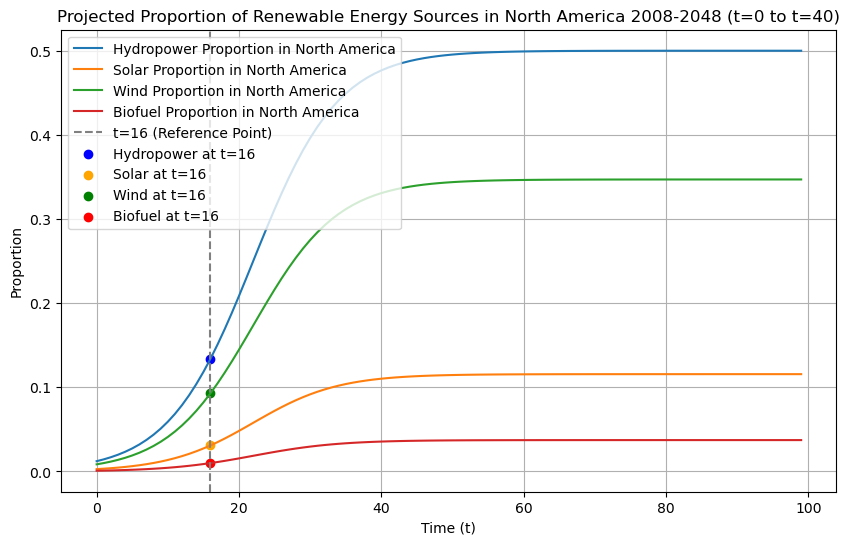

Times when total renewable energy proportions reach thresholds:
Threshold 0.25: t=16
Threshold 0.5: t=23
Threshold 0.75: t=29
Threshold 0.99: t=50
Energy Composition at Specific Time Steps:

Composition at t = 16:
  Hydropower: 0.134000
  Solar: 0.031000
  Wind: 0.093000
  Biofuel: 0.010000

Composition at t = 23:
  Hydropower: 0.270884
  Solar: 0.062667
  Wind: 0.188002
  Biofuel: 0.020215

Composition at t = 29:
  Hydropower: 0.381777
  Solar: 0.088321
  Wind: 0.264964
  Biofuel: 0.028491

Composition at t = 50:
  Hydropower: 0.495444
  Solar: 0.114618
  Wind: 0.343853
  Biofuel: 0.036973


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 100)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogistic.png")
plt.show()

# Calculate the total renewable energy proportion over time
total_renewable_proportions = np.zeros_like(t, dtype=float)

# Sum the proportions from all renewable sources at each time step
for source, proportions in renewable_proportions.items():
    total_renewable_proportions += proportions

# Define thresholds to find
thresholds = [0.25, 0.5, 0.75, 0.99]
threshold_times = {}

# Find the first time each threshold is reached
for threshold in thresholds:
    try:
        time_reached = t[np.where(total_renewable_proportions >= threshold)[0][0]]
        threshold_times[threshold] = time_reached
    except IndexError:
        threshold_times[threshold] = None  # If the threshold is not reached

# Display the results
print("Times when total renewable energy proportions reach thresholds:")
for threshold, time_reached in threshold_times.items():
    if time_reached is not None:
        print(f"Threshold {threshold}: t={time_reached}")
    else:
        print(f"Threshold {threshold}: Not reached within the given time period.")
# Define specific time steps
time_steps = [16, 23, 29, 50]

# Dictionary to store proportions for each time step
proportions_at_steps = {time: {} for time in time_steps}

# Extract proportions for each specified time step
for time in time_steps:
    for source, proportions in renewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("Energy Composition at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nComposition at t = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


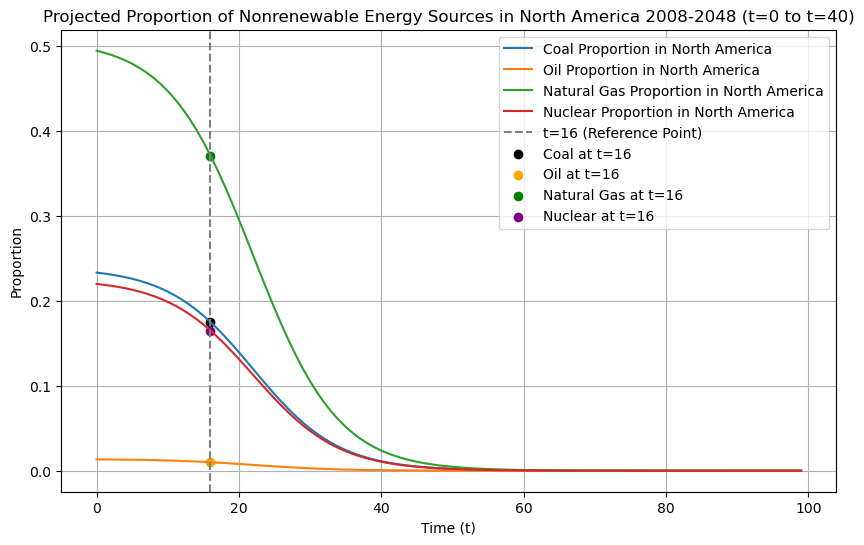

Nonrenewable Energy Composition at Specific Time Steps:

Composition at t = 16:
  Coal: 0.175000
  Oil: 0.010000
  Natural Gas: 0.371000
  Nuclear: 0.165000

Composition at t = 23:
  Coal: 0.109550
  Oil: 0.006260
  Natural Gas: 0.232246
  Nuclear: 0.103290

Composition at t = 29:
  Coal: 0.056528
  Oil: 0.003230
  Natural Gas: 0.119839
  Nuclear: 0.053297

Composition at t = 50:
  Coal: 0.002178
  Oil: 0.000124
  Natural Gas: 0.004618
  Nuclear: 0.002054


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 100)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.175,
    "Oil": 0.01,
    "Natural Gas": 0.371,
    "Nuclear": 0.165
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogistic.png")
plt.show()
# Define specific time steps
time_steps = [16, 23, 29, 50]

# Dictionary to store proportions for each time step
proportions_at_steps = {time: {} for time in time_steps}

# Extract proportions for each specified time step
for time in time_steps:
    for source, proportions in nonrenewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("Nonrenewable Energy Composition at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nComposition at t = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


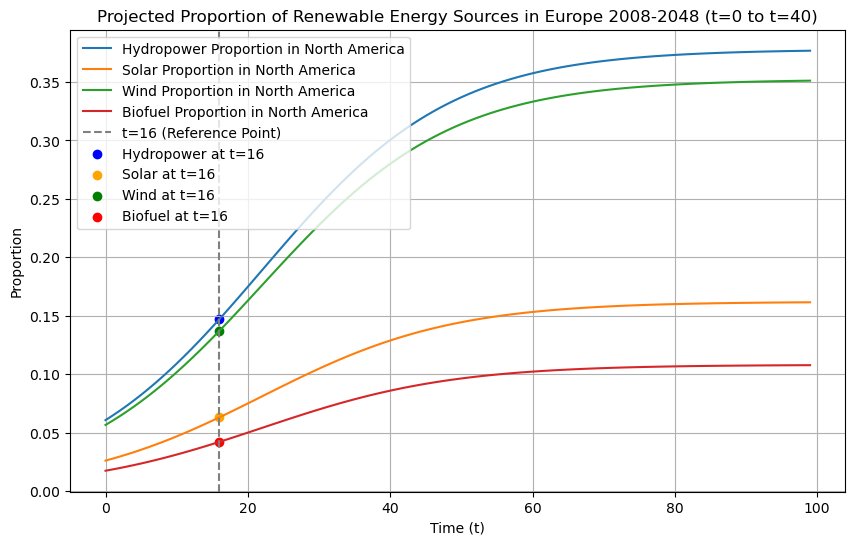

Times when total renewable energy proportions reach thresholds:
Threshold 0.25: t=8
Threshold 0.5: t=23
Threshold 0.75: t=37
Threshold 0.99: t=84
Energy Composition at Specific Time Steps:

Composition at t = 8:
  Hydropower: 0.097702
  Solar: 0.041872
  Wind: 0.091056
  Biofuel: 0.027915

Composition at t = 23:
  Hydropower: 0.196052
  Solar: 0.084022
  Wind: 0.182715
  Biofuel: 0.056015

Composition at t = 37:
  Hydropower: 0.285541
  Solar: 0.122375
  Wind: 0.266117
  Biofuel: 0.081583

Composition at t = 84:
  Hydropower: 0.374368
  Solar: 0.160443
  Wind: 0.348901
  Biofuel: 0.106962


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.07525293  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 100)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.147,
    "Solar": 0.063,
    "Wind": 0.137,
    "Biofuel": 0.042
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in Europe 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogistic.png")
plt.show()

# Calculate the total renewable energy proportion over time
total_renewable_proportions = np.zeros_like(t, dtype=float)

# Sum the proportions from all renewable sources at each time step
for source, proportions in renewable_proportions.items():
    total_renewable_proportions += proportions

# Define thresholds to find
thresholds = [0.25, 0.5, 0.75, 0.99]
threshold_times = {}

# Find the first time each threshold is reached
for threshold in thresholds:
    try:
        time_reached = t[np.where(total_renewable_proportions >= threshold)[0][0]]
        threshold_times[threshold] = time_reached
    except IndexError:
        threshold_times[threshold] = None  # If the threshold is not reached

# Display the results
print("Times when total renewable energy proportions reach thresholds:")
for threshold, time_reached in threshold_times.items():
    if time_reached is not None:
        print(f"Threshold {threshold}: t={time_reached}")
    else:
        print(f"Threshold {threshold}: Not reached within the given time period.")
# Define specific time steps
time_steps = [8, 23, 37, 84]

# Dictionary to store proportions for each time step
proportions_at_steps = {time: {} for time in time_steps}

# Extract proportions for each specified time step
for time in time_steps:
    for source, proportions in renewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("Energy Composition at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nComposition at t = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


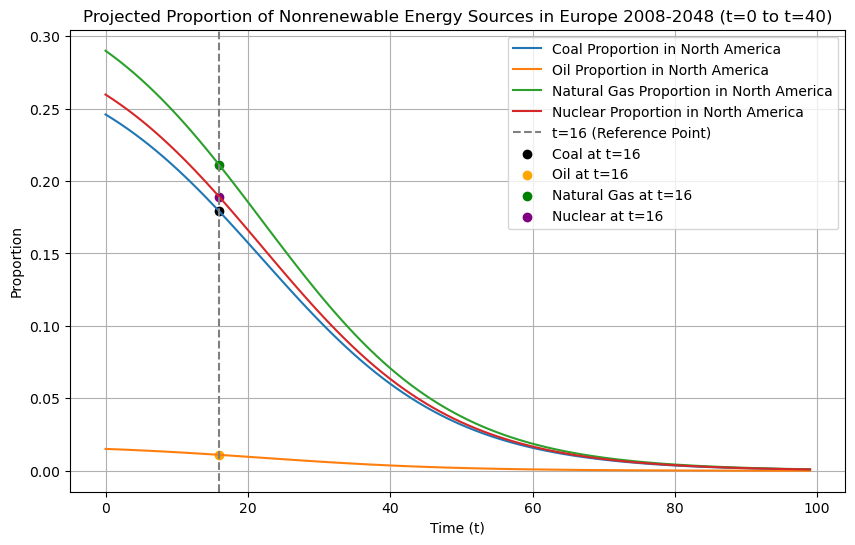

Nonrenewable Energy Composition at Specific Time Steps:

Composition at t = 8:
  Coal: 0.217218
  Oil: 0.013349
  Natural Gas: 0.256051
  Nuclear: 0.229353

Composition at t = 23:
  Coal: 0.140972
  Oil: 0.008663
  Natural Gas: 0.166174
  Nuclear: 0.148848

Composition at t = 37:
  Coal: 0.071595
  Oil: 0.004400
  Natural Gas: 0.084394
  Nuclear: 0.075595

Composition at t = 84:
  Coal: 0.002732
  Oil: 0.000168
  Natural Gas: 0.003220
  Nuclear: 0.002885


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.07525293 # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 100)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.147,
    "Solar": 0.063,
    "Wind": 0.137,
    "Biofuel": 0.042
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.179,
    "Oil": 0.011,
    "Natural Gas": 0.211,
    "Nuclear": 0.189
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in Europe 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogistic.png")
plt.show()
# Define specific time steps
time_steps = [8, 23, 37, 84]

# Dictionary to store proportions for each time step
proportions_at_steps = {time: {} for time in time_steps}

# Extract proportions for each specified time step
for time in time_steps:
    for source, proportions in nonrenewable_proportions.items():
        proportions_at_steps[time][source] = proportions[time]

# Display the proportions for each time step
print("Nonrenewable Energy Composition at Specific Time Steps:")
for time, sources in proportions_at_steps.items():
    print(f"\nComposition at t = {time}:")
    for source, proportion in sources.items():
        print(f"  {source}: {proportion:.6f}")


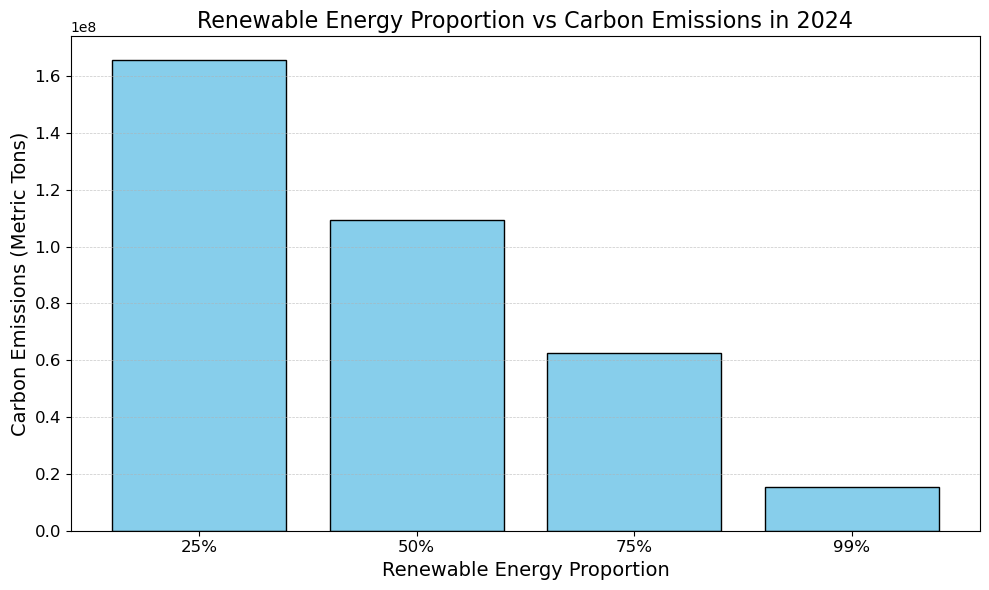

[165690906.6398553, 109348241.9570089, 62575554.272676505, 15401727.96459632]

In [12]:
import matplotlib.pyplot as plt

# Data
renewable_energy_proportion = ["25%", "50%", "75%", "99%"]
carbon_emissions = [1608964.26432*102.979855, 1061841.09462*102.979855, 607648.49856*102.979855, 149560.5909*102.979855]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(renewable_energy_proportion, carbon_emissions, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Renewable Energy Proportion vs Carbon Emissions in 2024", fontsize=16, color='black')
plt.xlabel("Renewable Energy Proportion", fontsize=14, color='black')
plt.ylabel("Carbon Emissions (Metric Tons)", fontsize=14, color='black')

# Customize the tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("RenewableEnergy_vs_CarbonEmissions_2024.png")
plt.show()
carbon_emissions

In [25]:
165690906.6398553-109348241.9570089

56342664.6828464

In [27]:
109348241.9570089-62575554.272676505

46772687.68433239

In [29]:
62575554.272676505-15401727.96459632

47173826.30808018